In [169]:
import os
import tensorflow as tf
import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.python.framework import ops
from random import randint
import matplotlib.image as mpimg


48
/data/tutorial/test/00014_00003.jpg
0
(1, 64, 64, 3)
(12288, 1)
(12288, 1)


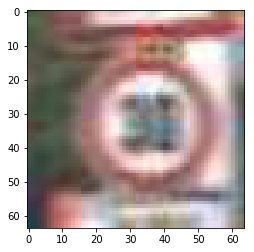

In [184]:
filenames = [];
labels = [];
for filename in os.listdir("/data/tutorial/test"):
    if filename.endswith(".jpg"):
        filenames.append("/data/tutorial/test/"+filename)
        if filename.startswith("14_"):
            labels.append(1)
        else:
            labels.append(0)

index  = randint(0, len(filenames))
print(index)
print(filenames[index])
print(labels[index])
y=labels[index]
if y==0:
    y=np.array([[1,0]])
else:
     y=np.array([[0,1]])
img = mpimg.imread(filenames[index])
plt.imshow(img)
image_data = np.array([np.array(Image.open(filenames[index]))])
print(image_data.shape)
X_train_flatten = image_data.reshape(image_data.shape[0], -1).T
print(X_train_flatten.shape)
X_train_flatten=X_train_flatten/255
print(X_train_flatten.shape)

In [185]:
tf.reset_default_graph()
import scipy
from PIL import Image
from scipy import ndimage

fname = filenames[index]
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image = my_image/255
print(my_image.shape)

with tf.Session() as sess:  
    saver = tf.train.import_meta_graph('/data/tutorial/stop_sign_model/model.meta')
    saver.restore(sess,tf.train.latest_checkpoint('/data/tutorial/stop_sign_model/'))
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0")
    Z3 = sess.run('Add_2:0', feed_dict={X: my_image})
    correct=tf.equal(tf.argmax(Z3),tf.argmax(y))
    out = sess.run(tf.argmax(Z3))
    #print(sess.run(correct))
    Z3 = np.array([Z3[0][0],Z3[1][0]])
    probs =  sess.run(tf.nn.softmax(Z3))
    #print(probs)
    
    if out==0:
        print("Given image is a Stop Sign")
    else:
        print("Given image is a not a Stop Sign")

(12288, 1)
INFO:tensorflow:Restoring parameters from /data/tutorial/stop_sign_model/model
Given image is a not a Stop Sign
